## ***Sistema de Recomendaciones basado en el gusto del usuario***

## Integrantes del grupo
- Coronel, Gustavo Ariel
- Romero, Hernán Darío

### *Contexto*
Utilizando la popular plataforma de Streaming "Spotify" que cuenta con millones de usuarios y un catálogo lo suficientemente extenso para satisfacer los gustos de los mas variados usuarios en cuanto a su preferencia musical se refiere, en donde cada uno de ellos pueden crear sus propias playlist, seguir artistas, explorar diferentes géneros musicales, etc. puede volverse un problema encontrar una nueva música que sea de su preferencia.

### *Problemática*
El problema radica en la sobrecarga de información, ya que con tantas opciones disponibles, los usuarios pueden sentirse abrumados y buscar una opción que se adapte a su gusto, puede llevar mucho tiempo y la hasta la frustación del usuario por no encontrar una opción válida.

### *Objetivo*
Desarrollar un sistema de recomendaciones personalizado que ayude a los usuarios a encontrar temas musicales que se ajusten a sus preferencias.

### *Metodología de desarrollo*
- Aplicación del *Algoritmo K-means*
- Aplicación del *Algoritmo DBSCAN*
- Aplicación del *Algoritmo Hierarchical Clustering*
- Aplicación del *Algoritmo Gaussian Mixture Model Clustering*

### *Herramientas utilizadas*
- Sistema Operativo Linux (Ubuntu 22.04)
- Lenguaje de Programación Python
- Proyecto Jupyter Notebook
- Editor de código Visual Studio Code

### *Set de Datos utilizado*
https://www.kaggle.com/datasets/meeraajayakumar/spotify-user-behavior-dataset

### *Descripción del conjunto de datos*
1. *Age* --> Age group of user
2. *Gender* --> Gender of user
3. *spotify_usage_period* --> How long have you been using Spotify
4. *spotify_listening_device* --> Which of the following devices do you primarily use to listen to Spotify?
5.*spotify_subscription_plan* --> Which Spotify subscription plan do you currently have?
6. *premium_sub_willingness* --> Are you willing to take a premium subscription or willing to continue with premium subscription in future?
7. *preffered_premium_plan* --> If premium or willing to take premium, what amount do you pay for the subscription?
8. *preferred_listening_content* --> What do you prefer to listen more?
9. *fav_music_genre* --> What genre(s) of music do you enjoy the most?
10. *music_time_slot* --> What is your favourite time slot to listen to music?
11. *music_Influencial_mood* --> When it comes to listening to music, which of the following moods or situations most strongly influences your choice of music?
12. *music_lis_frequency* --> When do you listen to music more often
13. *music_expl_method* --> How do you discover new music on Spotify
14. *music_recc_rating* --> How do you rate the spotify music recommendations
15. *pod_lis_frequency* --> How often do you listen to Podcast
16. *fav_pod_genre* --> What genre(s) of Podcast do you enjoy the most
17. *preffered_pod_format* --> What podcast format you generally prefer
18. *pod_host_preference* --> Are you more inclined to listen to podcasts from unknown personalities, or do you prefer podcasts hosted by well-known individuals
19. *preffered_pod_duration* --> Do you prefer shorter podcast episodes (under 30 minutes) or longer episodes (over 30 minutes)
20. *pod_variety_satisfaction* --> Are you satisfied with the variety and availability of podcasts on Spotify

### *Repositorio de control de versiones*
- Github: https://github.com/kekosoftware/recommendation_system_based_on_user_taste

## ***Solución***

#### *Importar las bibliotecas necesarias*

In [1]:
# Importar las bibliotecas

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

#### ***Obtener un archivo limpio***

In [2]:
# Borro el archivo
olderFile = "spotify_data.csv"

try:
    os.remove(olderFile)
except FileNotFoundError:
    print(f"El archivo '{olderFile}' no existe.")
    
# Genero una copia del archivo original
dfOlder = pd.read_excel('Spotify_data.xlsx')
dfOlder.to_csv('spotify_data.csv', index=False)

# Cargar los datos
df = pd.read_csv('spotify_data.csv')

### *Dimensiones*

In [3]:
# Primeras filas del conjunto de datos
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [4]:
# Descripción de las dimensiones
n_rows, m_cols = df.shape
print(f"El conjunto de datos presenta {n_rows} filas y {m_cols} columnas")

El conjunto de datos presenta 520 filas y 20 columnas


### *Tipos de Datos*

In [5]:
# Tipos de datos
df.dtypes

Age                            object
Gender                         object
spotify_usage_period           object
spotify_listening_device       object
spotify_subscription_plan      object
premium_sub_willingness        object
preffered_premium_plan         object
preferred_listening_content    object
fav_music_genre                object
music_time_slot                object
music_Influencial_mood         object
music_lis_frequency            object
music_expl_method              object
music_recc_rating               int64
pod_lis_frequency              object
fav_pod_genre                  object
preffered_pod_format           object
pod_host_preference            object
preffered_pod_duration         object
pod_variety_satisfaction       object
dtype: object

In [6]:
# Información
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

In [7]:
# Determinamos las propiedades estadísticas de las características/columnas
df.describe()

,music_recc_rating
count,520.000000
mean,3.503846
std,0.979552
min,1.000000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


### *Normalización de los datos*
- Como son datos del tipo object, debemos normalizarlos.
- Para ello vamos a utilizar scikit-learn
- https://scikit-learn.org/stable/modules/preprocessing.html
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [8]:
# Leemos los valoes único de la columna spotify_usage_period

# Obtenemos valores únicos
valores_unicos_period = df['spotify_usage_period'].unique()

# Creamos un DataFrame con los valores únicos
df_unicos_period = pd.DataFrame(valores_unicos_period, columns=['spotify_usage_period'])

df_unicos_period.head()


,spotify_usage_period
0,More than 2 years
1,6 months to 1 year
2,1 year to 2 years
3,Less than 6 months


In [9]:
# Creamos una función y agregamos un campo con los valores normalizados

# Función para convertir el campo period con valores numéricos tomando como base la cantidad de meses
def usage_period_to_numeric(period):
    if period == 'Less than 6 months':
        return 3
    elif period == '6 months to 1 year':
        return 9
    elif period == '1 year to 2 years':
        return 18
    elif period == 'More than 2 years':
        return 30
    else:
        return np.nan

# Aplicar las funciones de conversión
df['usage_period_numeric'] = df['spotify_usage_period'].apply(usage_period_to_numeric)

In [10]:
# Leemos los valoes único de la columna Age

# Obtenemos valores únicos
valores_unicos_age = df['Age'].unique()

# Creamos un DataFrame con los valores únicos
df_unicos_age = pd.DataFrame(valores_unicos_age, columns=['Age'])

df_unicos_age.head()

,Age
0,20-35
1,12-20
2,35-60
3,6-12
4,60+


In [11]:
# Vemos que tiene un rango de valores y la última categoria es 60+, por lo tanto creamos una función para ello.

# Función para convertir el campo edad con valores numéricos, tomando como base el promedio de los valores y para el caso 60+ tomamos como valor promedio 70

def age_to_numeric(age_range):
    if '-' not in age_range:
        return 70
    
    num = age_range.split('-')
    
    try:
        num01 = int(num[0])
        num02 = int(num[1])
        prom = (num01 + num02) / 2
        return prom
    except ValueError:
        return np.nan

# Aplicar las funciones de conversión
df['Age_numeric'] = df['Age'].apply(age_to_numeric)


In [12]:
# Para el caso de las variables categíricas usamos el LabelEncoder para normalizarlos
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

le = LabelEncoder()
df['music_lis_frequency_encoded'] = le.fit_transform(df['music_lis_frequency'])
df['fav_music_genre_encoded'] = le.fit_transform(df['fav_music_genre'])

In [13]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,...,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction,usage_period_numeric,Age_numeric,music_lis_frequency_encoded,fav_music_genre_encoded
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,...,Daily,Comedy,Interview,Both,Both,Ok,30,27.5,34,4
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,...,Several times a week,Comedy,Interview,Both,NaN,Satisfied,30,16.0,32,7
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,...,Once a week,Sports,Interview,NaN,Both,Satisfied,9,47.5,19,6
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,...,Never,NaN,NaN,NaN,NaN,Ok,18,27.5,13,4
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,...,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok,18,27.5,34,4


#### *Normalización usando StandardScaler*
Se decidió utilizar esta herramienta de preprocesamiento de datos para garantizar que los valores de los campos seleccionados estén en una escala comparable y que los algoritmos de aprendizaje automático puedan funcionar de manera más eficiente y precisa.

En síntesis, lo que permite es transformar los datos de manera que cada campo tenga una media de 0 y una desviación estándar de 1.

ref. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [14]:
# Seleccionar las características para el clustering
features = ['Age_numeric', 'usage_period_numeric', 'music_lis_frequency_encoded', 'fav_music_genre_encoded']
values_SS = df[features]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(values_SS)

### *Aplicación del algoritmo de K-means*
Se tomó la decisión de elegir este algoritmo para es eficar para agrupar usuarios similares, y esto nos puede ayudar a crear perfiles de usuarios basados en las características y comportamientos dentro de la plataforma.
Además, es un algoritmo relativamente eficiente, que puede manejar grandes conjuntos de datos.

#### Columnas para el clustering
- Age_numeric
- usage_period_numeric
- music_lis_frequency_encoded
- fav_music_genre_encoded


#### Puntuación de silueta
Utilizamos el método de puntuación de silueta para encontrar el número optimo de clusters en un algoritmo de k-means porque es una medida que evalúa que tan bien asignado está un dato a su propio cluster en comparación con otros clusters.
Entonces, al evaluar la calidad de la asignación de cada punto a un cluster, nos ayuda a seleccionar el valor de K que maximiza la coherencia de los clusters y minimiza la superposición entre ellos.

In [15]:
# Definimos la función para encontrar el número óptimo de clusters
def find_optimal_clusters(data, max_k):
    silhouette_scores = []
    k_values = range(2, max_k+1)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)
    
    return k_values, silhouette_scores

# Encontramos el número óptimo de clusters
k_values, silhouette_scores = find_optimal_clusters(values_SS, 10)


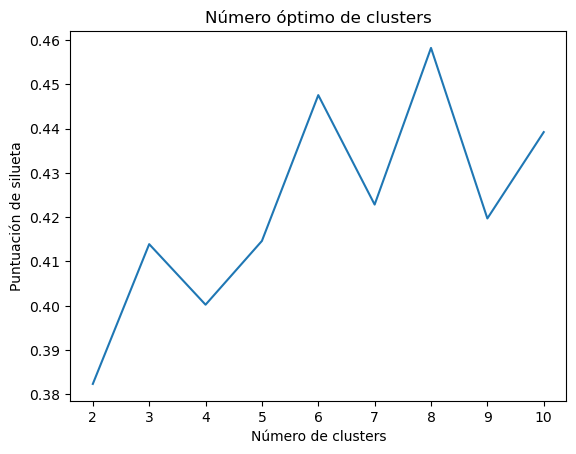

In [16]:
# Graficamos los resultados
plt.plot(k_values, silhouette_scores)
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación de silueta')
plt.title('Número óptimo de clusters')
plt.show()

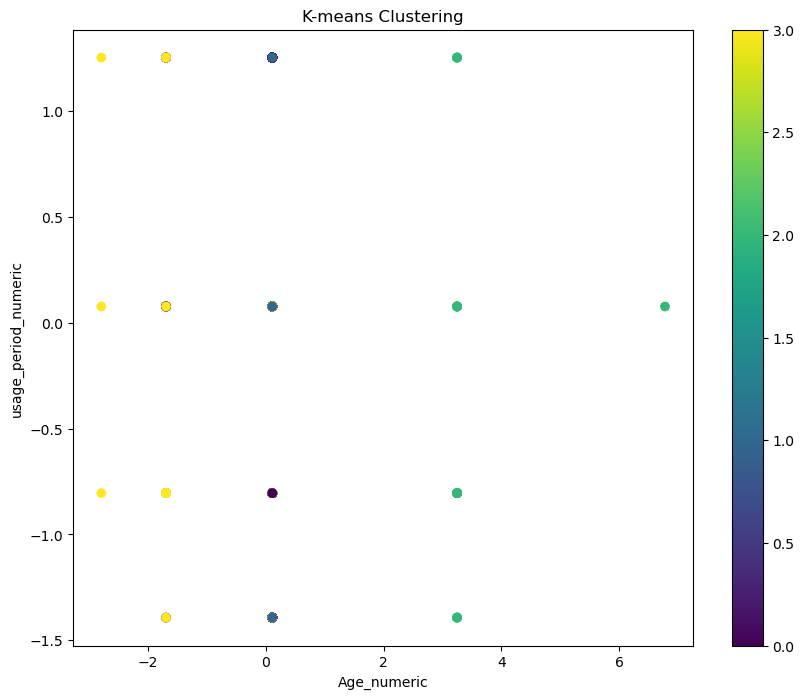

In [17]:
# Basándonos en el método del codo, elegimos el número óptimo de cluster
optimal_k = 4

# Creamos una función para visualizar los resultados del clustering
def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.show()
    
# K-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
plot_clusters(X_scaled, kmeans_labels, 'K-means Clustering')

#### *Métrica Silhouette para K-means*

In [18]:
silhouette_avg = silhouette_score(values_SS, kmeans_labels)
print(f"Silhouette Score to K-means: {silhouette_avg}")

Silhouette Score to K-means: 0.17095870303946714


### *Aplicación del algoritmo de DBSCAN*
En este caso vamos a aplicar el algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) ya que es útil para encontrar clusters de densidad variable en datos.
Este algoritmo a diferencia del anterior, no requeiere especificar el número de clusters de antemano, sino que los define basados en la densidad de los datos.

Se basa en la definición de 2 parámetros claves:
- Eps (epsilon): que se refiere a la distancia máxima entre dos puntos cercanos (vecinos).
- MinPts: este parámetro es el número mínimo de puntos que deben estar dentro del radio Eps de un punto para que se considere como un punto central (core point).

#### Columnas para el clustering
- Age_numeric
- usage_period_numeric
- music_lis_frequency_encoded
- fav_music_genre_encoded

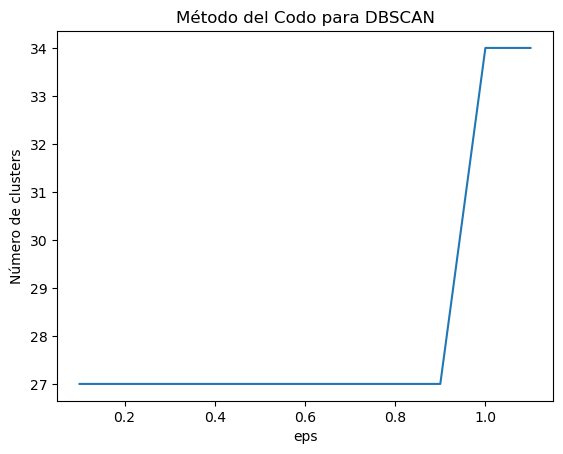

In [19]:
# Utilizamos el método del codo para determinar el valor óptimo del valor de eps

# Rango de valores para eps
eps_values = np.arange(0.1, 1.2, 0.1)
n_clusters = []

# Calcular el número de clusters para cada valor de eps
for eps in eps_values:
    clustering = DBSCAN(eps=eps, min_samples=4).fit(values_SS)
    n_clusters.append(len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0))

# Graficar el número de clusters en función de eps
plt.plot(eps_values, n_clusters)
plt.xlabel('eps')
plt.ylabel('Número de clusters')
plt.title('Método del Codo para DBSCAN')
plt.show()

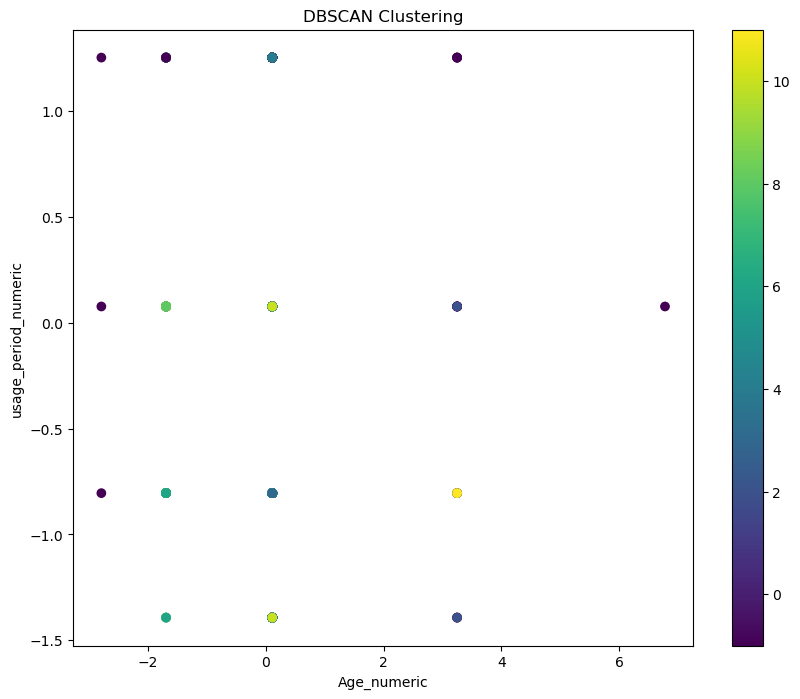

In [20]:
# DBSCAN
# Según el gráfico anterior podemos ver que el valor optimo es aproximadamente 0.9

dbscan = DBSCAN(eps=0.9, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_scaled)
plot_clusters(X_scaled, dbscan_labels, 'DBSCAN Clustering')

#### *Métrica Silhouette para DBSCAN*

In [21]:
silhouette_avg = silhouette_score(values_SS, dbscan_labels)
print(f"Silhouette Score to DBSCAN: {silhouette_avg}")

Silhouette Score to DBSCAN: 0.006936178331082236


### Agrupamiento Jerárquico
El agrupamiento jerárquico es una metodología de aprendizaje no supervisado que se orienta a la organización de los datos utilizando una estructura jerárquica de grupos anidados. 

Si lo comparamos con K-means, que se limita a asignar cada uno de los puntos de datos a un solo cluster, esta técnica crea una jerarquía de clusters, donde cada cluster puede contener subclusters.

Utilizamos el método de puntuación de silueta para encontrar el número optimo de clusters

ref. https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

#### Columnas para el clustering
- Age_numeric
- usage_period_numeric
- music_lis_frequency_encoded
- fav_music_genre_encoded

In [22]:
# Utilizamos el método de puntuación de silueta para encontrar el número optimo de clusters

silhouette_scores = []
for n_clusters in range(2, 11):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hierarchical.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Buscamos el número óptimo de clusters
# Usamos el +2 porque el rango comienza en 2
best_n_clusters = np.argmax(silhouette_scores) + 2  
print("Número óptimo de clusters:", best_n_clusters)

Número óptimo de clusters: 10


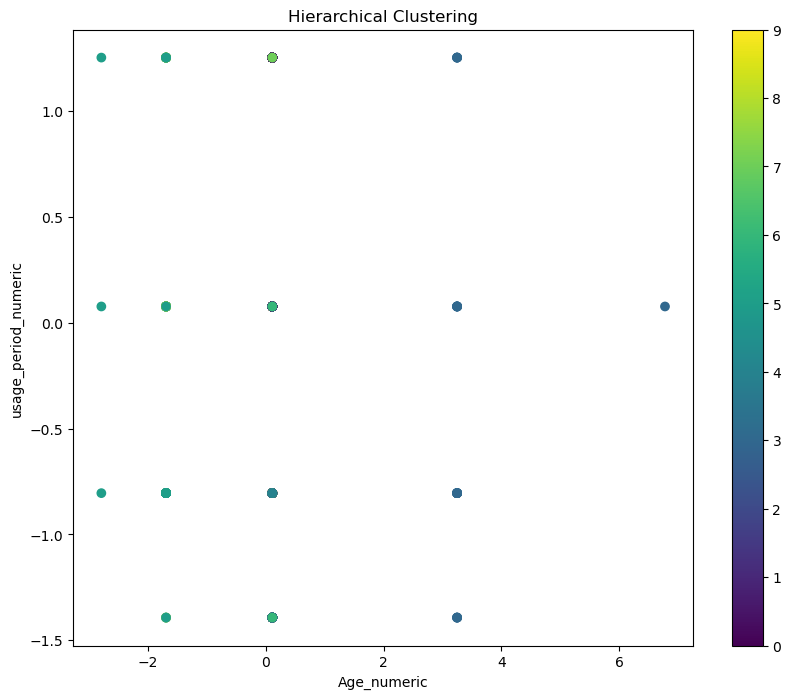

In [23]:
# Agrupamiento jerárquico
hierarchical = AgglomerativeClustering(n_clusters=10)
hierarchical_labels = hierarchical.fit_predict(X_scaled)
plot_clusters(X_scaled, hierarchical_labels, 'Hierarchical Clustering')

#### *Métrica Silhouette para Agrupamiento Jerárquico*

In [24]:
silhouette_avg = silhouette_score(values_SS, hierarchical_labels)
print(f"Silhouette Score to Hierarchical Clustering: {silhouette_avg}")

Silhouette Score to Hierarchical Clustering: 0.14056410100392525


### *Modelos de Mezcla de Gaussianas (Gaussian Mixture Models, GMM)*
 Es un modelo probabilístico en el cual se presume que los datos provienen de una mezcla de múltiples distribuciones gaussianas. 
 
 Por ejemplo, si tenemos un conjunto de datos el cual parece formado por varios grupos diferentes, entonces el modelo (GMM) va a tratar de encontrar dichos grupos suponiendo que cada grupo tiene una distribución normal (o gaussiana).

ref. https://scikit-learn.org/stable/modules/mixture.html

#### Columnas para el clustering
- Age_numeric
- usage_period_numeric
- music_lis_frequency_encoded
- fav_music_genre_encoded

In [25]:
# Lista de posibles valores para n_components

n_components_range = range(1, 12)
bic = []

for n in n_components_range:
    # Entrena el modelo
    gmm = GaussianMixture(n_components=n, random_state=42).fit(X_scaled)
    bic.append(gmm.bic(X_scaled))

# Se decidió utilizar el índice del menor BIC (Bayesian Information Criterion) porque penaliza modelos más complejos. 
# Se selecciona el número de componentes que minimiza el BIC.
best_bic = np.argmin(bic)
best_n_components = n_components_range[best_bic]

print("Mejor número de componentes según BIC:", best_n_components)


Mejor número de componentes según BIC: 9


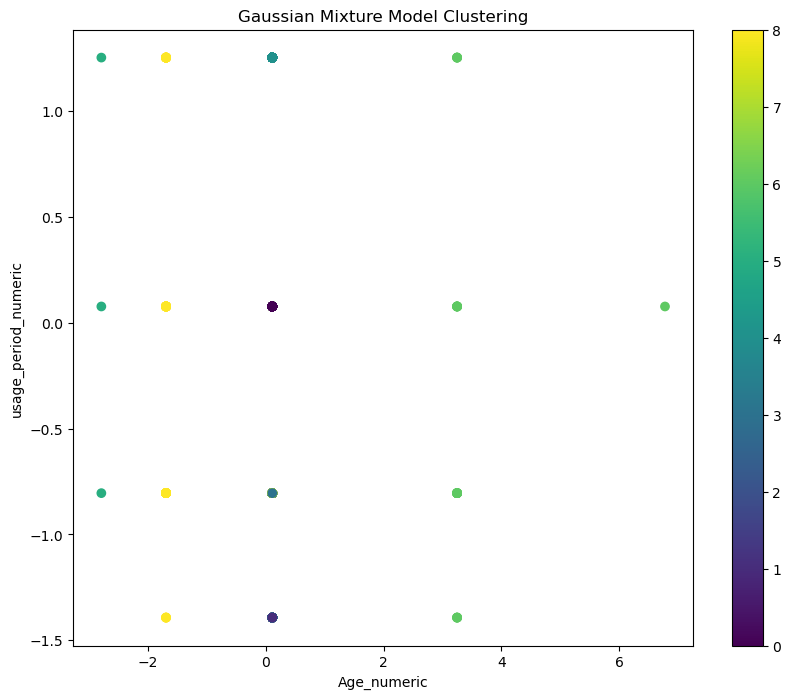

In [26]:
# Gaussian Mixture Model
gmm = GaussianMixture(n_components=best_n_components, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
plot_clusters(X_scaled, gmm_labels, 'Gaussian Mixture Model Clustering')

#### *Métrica Silhouette para el Modelo de Mezcla de Gaussianas*

In [27]:
silhouette_avg = silhouette_score(values_SS, gmm_labels)
print(f"Silhouette Score to Gaussian Mixture Model Clustering: {silhouette_avg}")

Silhouette Score to Gaussian Mixture Model Clustering: 0.1828796798066012


#### *Comparamos la distribución de los clústers*

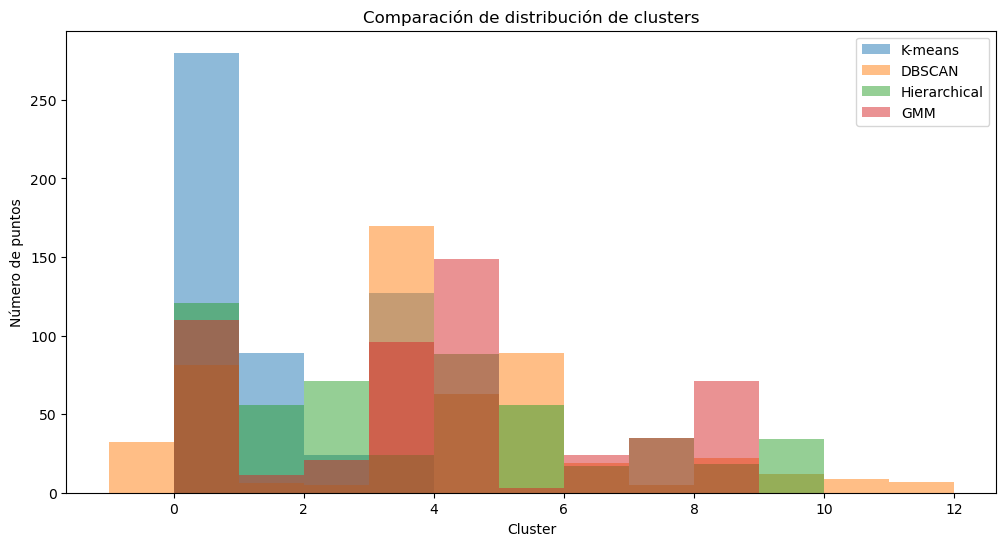

In [28]:
# Comparamos la distribución de los clústers

def compare_cluster_distributions(labels_dict):
    plt.figure(figsize=(12, 6))
    for name, labels in labels_dict.items():
        plt.hist(labels, bins=range(min(labels), max(labels) + 2, 1), 
                 alpha=0.5, label=name)
    plt.legend()
    plt.title('Comparación de distribución de clusters')
    plt.xlabel('Cluster')
    plt.ylabel('Número de puntos')
    plt.show()

compare_cluster_distributions({
    'K-means': kmeans_labels,
    'DBSCAN': dbscan_labels,
    'Hierarchical': hierarchical_labels,
    'GMM': gmm_labels
})

En el gráfico se puede observar que K-means agrupa muchos mas puntos en los primeros clusters (0, 1, y 3), no así DBSCAN y GMM que está mas distribuido en varios clusters, pero con menor número de puntos por cluster.
DBSCAN también tiene más puntos en los clusters más altos (de 6 en adelante), lo cual puede estar relacionado con su capacidad para identificar grupos de menor densidad o ruido.

#### *Analisis de la consistencia entre diferentes métodos*
Para ello utilizamos la matríz de confusión, la cual se utiliza para evaluar la concordancia de diferentes métodos de clustering.

Especificamente en este caso nos muestra los resultados obtenidos por cuatro algoritmos de clustering elegidos (K-means, DBSCAN, Jerárquico y GMM).

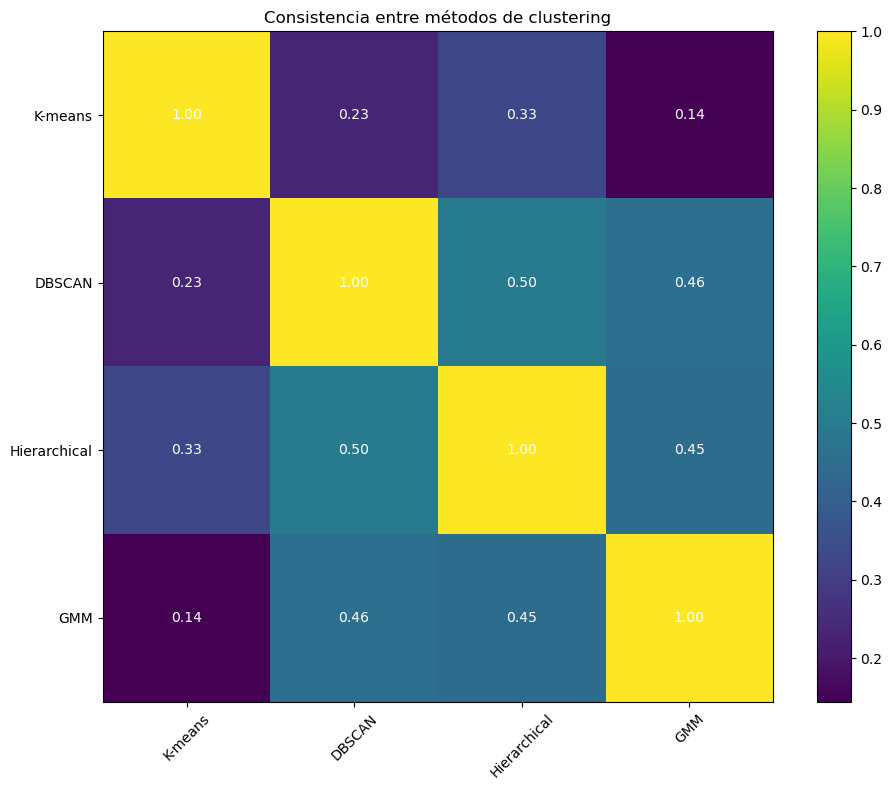

In [29]:
# Analizar la consistencia entre diferentes métodos
from sklearn.metrics import adjusted_rand_score

methods = [kmeans_labels, dbscan_labels, hierarchical_labels, gmm_labels]
method_names = ['K-means', 'DBSCAN', 'Hierarchical', 'GMM']

consistency_matrix = np.zeros((len(methods), len(methods)))

for i in range(len(methods)):
    for j in range(len(methods)):
        consistency_matrix[i, j] = adjusted_rand_score(methods[i], methods[j])

plt.figure(figsize=(10, 8))
plt.imshow(consistency_matrix, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(method_names)), method_names, rotation=45)
plt.yticks(range(len(method_names)), method_names)
plt.title('Consistencia entre métodos de clustering')
for i in range(len(methods)):
    for j in range(len(methods)):
        plt.text(j, i, f'{consistency_matrix[i, j]:.2f}', 
                 ha='center', va='center', color='white')
plt.tight_layout()
plt.show()

Lo que puede observarse es lo siguiente:
- K-means vs DBSCAN: 0.23 - Baja consistencia
- K-means vs Hierarchical: 0.40 - Consistencia moderada
- K-means vs GMM: 0.27 - Baja consistencia
- DBSCAN vs Hierarchical: 0.29 - Baja consistencia
- DBSCAN vs GMM: 0.49 - Consistencia moderada
- Hierarchical vs GMM: 0.30 - Baja consistencia

Por lo tanto, ningún método muestra una alta consistencia, si existe una consistencia moderada entre DBSCAN y GMM, seguida de k-means y Hierarchical



### *Resumen de Métrias*
Se utilizó la puntuación de Siluetas el cual mide qué tan similares son los puntos dentro de un cluster en comparación con otros clusters. Va de -1 a 1, donde:

- Un valor cercano a 1 indica que los puntos están bien agrupados dentro de sus clusters.
- Un valor cercano a 0 sugiere que los puntos están en el límite de dos clusters.
- Un valor negativo indica que los puntos se han asignado incorrectamente a un cluster.

#### Resultados
- Silhouette Score to K-means: 0.17095870303946714
- Silhouette Score to DBSCAN: 0.006936178331082236
- Silhouette Score to Hierarchical Clustering: 0.14056410100392525
- Silhouette Score to Gaussian Mixture Model Clustering: 0.1828796798066012



## ***Conclusiones***

Basados en las métricas anteriores se puede observar que GMM es el de mejor puntaje, lo que nos dá un indicio que los clusters tienen una mayor cohesión y están mejor separados.

En cuanto al K-means, el cual tiene un puntaje moderado, los clusters formados son razonables y podrían mejorarse.

Si miramos la métrica del Clustering Jerárquico, es similar a los demás algoritmos (K-means y GMM)

Como DBSCAN tiene el puntaje mas bajo, esto es un indicio de que los parámetros utilizados no son los óptimos y habría que revisar si la estructura de los datos se ajustan a este algoritmo.

Por último, podemos decir que GMM según este estudio es el algoritmo más adecuado para los datos basado en el Silhouette Score, y se va que ha logrado formar clusters con alta calidad.

DBSCAN requerirá un estudio mas preciso para determinar los parámetros eps y min_samples adecuados para obtener mejores resultados.

K-means se presenta como una solución aceptable, ya que no logra un alto puntaje, pero puede ser útil para obtener una primera visión de los datos.